**CUSTOMER SEGMENTATION USING PYTHON**

---



First we import the necessary packages and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
customer=pd.read_csv("Mall_Customers.csv")

We now display the first five rows of the dataset using the head()

In [3]:
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Now going into the mathematics of the dataset, let us find out the standard deviation, mean, minimum value and the four quartile percentile of the data.

In [5]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


*Vizualization of Age Distribution*


Using seaborn, a histogram based on the age of different customers is represented  

Text(0.5, 0, 'Age')

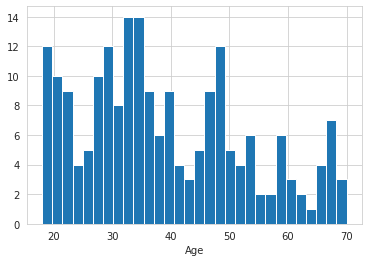

In [6]:
sns.set_style('whitegrid')
customer['Age'].hist(bins=30)
plt.xlabel('Age')

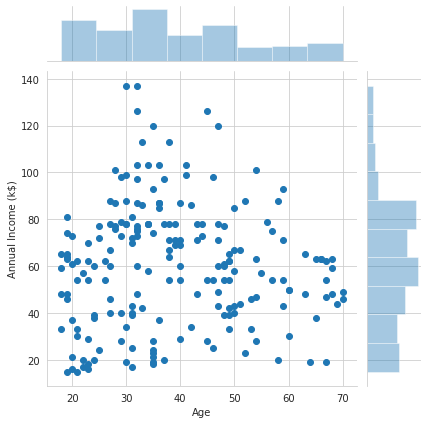

In [7]:
sns.jointplot(x='Age',y='Annual Income (k$)',data=customer)

Joint plot considering Age and Spending Score

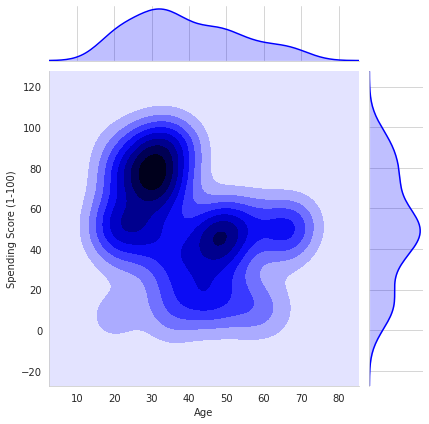

In [8]:
sns.jointplot(x='Age',y='Spending Score (1-100)',data=customer,color='blue',kind='kde')

Box plot for Annual Income comparing against Spending Score

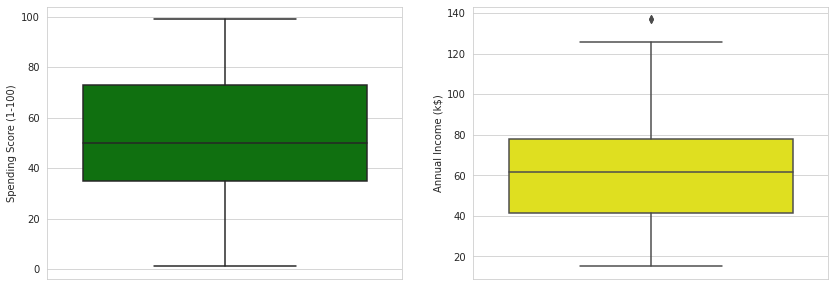

In [9]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(y=customer["Spending Score (1-100)"],color="green")
plt.subplot(1,2,2)
sns.boxplot(y=customer["Annual Income (k$)"],color="yellow")
plt.show()

Pairplot for pairwise relationship across an entire dataframe

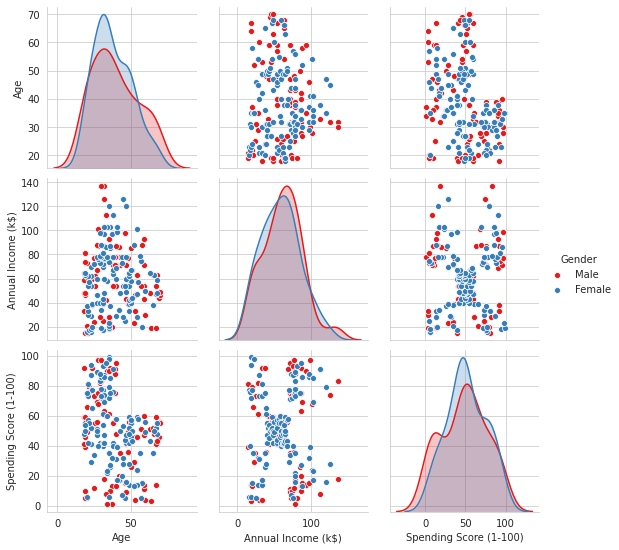

In [10]:
customer.drop(["CustomerID"], axis = 1, inplace=True)
sns.pairplot(customer,hue='Gender',palette='Set1')

Boxplot which indicates distribution of Male and Female Customers

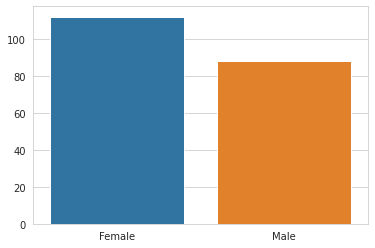

In [11]:
gender=customer.Gender.value_counts()
sns.barplot(x=gender.index,y=gender.values)

Barplot that depicts Distribution of Customers based on Age

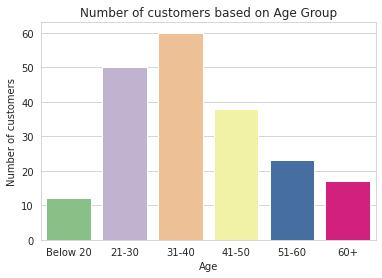

In [12]:
age0=customer.Age[(customer.Age<20)]
age1= customer.Age[(customer.Age>=20)&(customer.Age<=30)]
age2=customer.Age[(customer.Age>30)&(customer.Age<=40)]
age3=customer.Age[(customer.Age>40)&(customer.Age<=50)]
age4=customer.Age[(customer.Age>50)&(customer.Age<=60)]
age5=customer.Age[(customer.Age>60)]
x=['Below 20','21-30','31-40','41-50','51-60','60+']
y=[len(age0.values),len(age1.values),len(age2.values),len(age3.values),len(age4.values),len(age5.values)]
sns.barplot(x=x,y=y,palette='Accent')
plt.title(str("Number of customers based on Age Group"))
plt.xlabel(str("Age"))
plt.ylabel(str("Number of customers"))
plt.show()

*Vizualizing Number of Customers according to their Annual Income*

Text(0, 0.5, 'Number of customers')

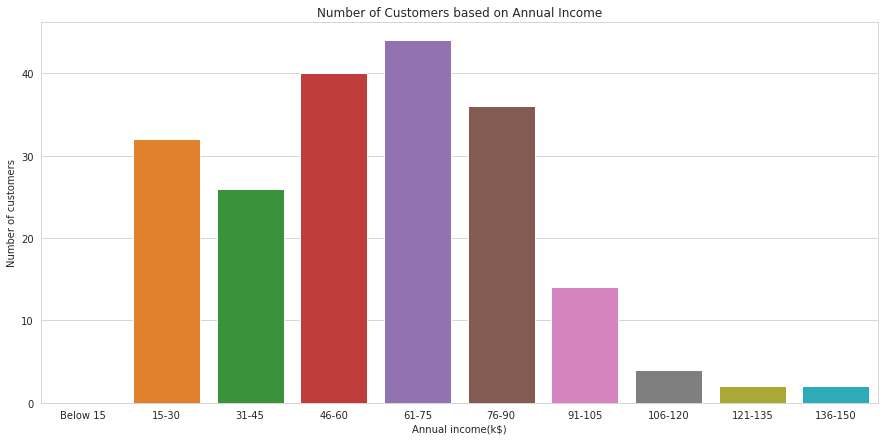

In [14]:
plt.figure(figsize=(15,7))
income0=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]<15)]
income1=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>=15)&(customer["Annual Income (k$)"]<=30)]
income2=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>30)&(customer["Annual Income (k$)"]<=45)]
income3=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>45)&(customer["Annual Income (k$)"]<=60)]
income4=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>60)&(customer["Annual Income (k$)"]<=75)]
income5=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>75)&(customer["Annual Income (k$)"]<=90)]
income6=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>90)&(customer["Annual Income (k$)"]<=105)]
income7=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>105)&(customer["Annual Income (k$)"]<=120)]
income8=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>120)&(customer["Annual Income (k$)"]<=135)]
income9=customer["Annual Income (k$)"][(customer["Annual Income (k$)"]>135)&(customer["Annual Income (k$)"]<=150)]
x=['Below 15','15-30','31-45','46-60','61-75','76-90','91-105','106-120','121-135','136-150']
y=[len(income0.values),len(income1.values),len(income2.values),len(income3.values),len(income4.values),len(income5.values),len(income6.values),len(income7.values),len(income8.values),len(income9.values)]
sns.barplot(x=x,y=y)
plt.title("Number of Customers based on Annual Income")
plt.xlabel("Annual income(k$)")
plt.ylabel("Number of customers")

*Pair plot of Annual Income of Customers based on CustomerID, Age and Spending Score*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


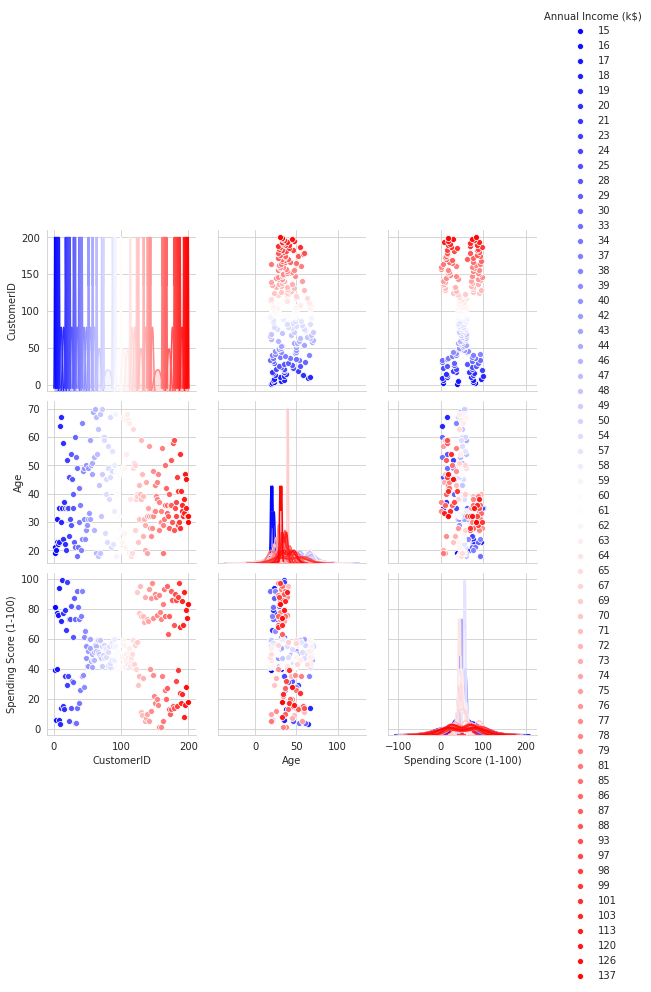

In [ ]:
sns.pairplot(ad_data,hue='Annual Income (k$)',palette='bwr')

*K-means Clustering Algorithm*

Finding Optimal number of Cluster values

In [19]:
from sklearn.cluster import KMeans

In [22]:
wcss=[]
gender=customer.Gender.value_counts()
for k in range(1,11):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(customer.iloc[:,2:])
  wcss.append(kmeans.inertia_)


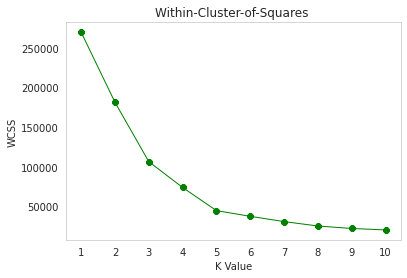

In [23]:
plt.grid()
plt.plot(range(1,11),wcss, linewidth=1, color="green", marker ="8")
plt.xlabel("K Value")
plt.title("Within-Cluster-of-Squares ")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans.labels_

array([9, 5, 2, 5, 9, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 9, 5, 9, 5, 9, 5,
       2, 5, 2, 5, 9, 5, 9, 5, 2, 5, 2, 5, 2, 5, 2, 5, 9, 5, 9, 5, 9, 1,
       9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 7, 4, 7, 4,
       6, 4, 7, 4, 7, 4, 7, 4, 7, 4, 6, 4, 7, 4, 6, 4, 7, 4, 7, 4, 7, 4,
       7, 4, 7, 4, 7, 4, 6, 4, 7, 4, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 8, 3, 8, 3, 8,
       3, 8], dtype=int32)

*Determining Optimal Cluster using Elbow Method*

Text(0.5, 0, 'Spending Score (1-100)')

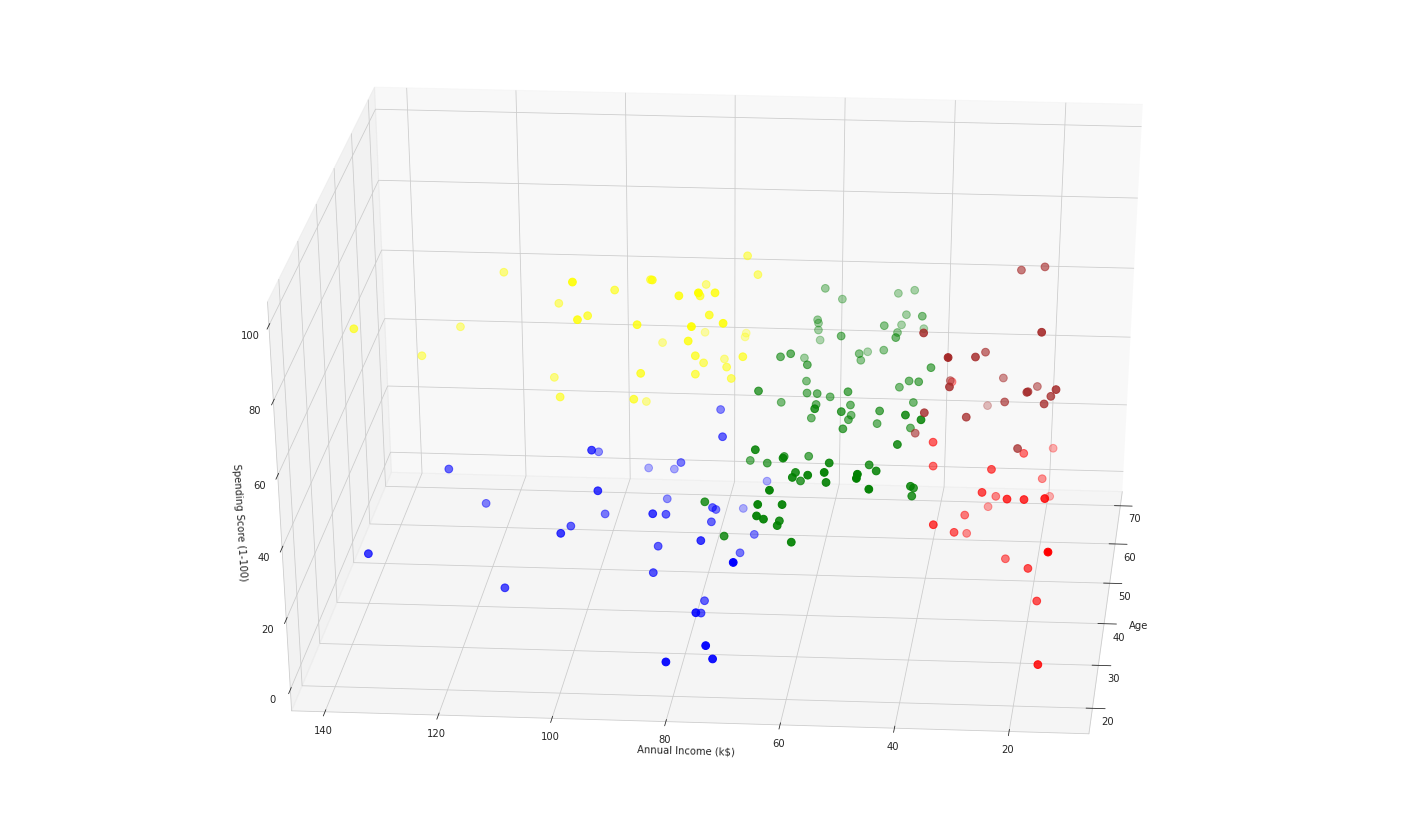

In [25]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(customer.iloc[:,2:])
customer["label"] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.Age[customer.label == 0], customer["Annual Income (k$)"][customer.label == 0], customer["Spending Score (1-100)"][customer.label == 0], c='green', s=60)
ax.scatter(customer.Age[customer.label == 1], customer["Annual Income (k$)"][customer.label == 1], customer["Spending Score (1-100)"][customer.label == 1], c='blue', s=60)
ax.scatter(customer.Age[customer.label == 2], customer["Annual Income (k$)"][customer.label == 2], customer["Spending Score (1-100)"][customer.label == 2], c='yellow', s=60)
ax.scatter(customer.Age[customer.label == 3], customer["Annual Income (k$)"][customer.label == 3], customer["Spending Score (1-100)"][customer.label == 3], c='red', s=60)
ax.scatter(customer.Age[customer.label == 4], customer["Annual Income (k$)"][customer.label == 4], customer["Spending Score (1-100)"][customer.label == 4], c='brown', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')